In [8]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
dataUrl = 'https://docs.google.com/spreadsheets/d/118YnVsc0A5GA27AY3rSI8trbRvRLdIw-/edit#gid=1648998831'.replace("/edit#gid=", "/export?format=csv&gid=")
dataframe = pd.read_csv(dataUrl)
del dataframe['建議備註']
del dataframe['引擎號碼']
del dataframe['車主姓名']
del dataframe['維修人員']
dataframe = dataframe.dropna()
dataframe = dataframe[dataframe['金額'] >= 0]
mask = [all([kw not in r for kw in ['強制險', '責任險', '失竊險', '傷害險']]) for r in dataframe['維修項目名稱']]
dataframe = dataframe[mask]
dataframe['維修日期'] = dataframe['維修日期'].apply(lambda x: datetime.strptime(x, "%Y/%m/%d"))
print(dataframe)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


        牌照號碼   維修日期  維修次數 維修代碼         維修項目名稱    金額
1        531-KLS 2021-06-14       1.0   107104           前碟煞車皮   350.0
2       NHR-9210 2021-06-14       1.0   104101               齒輪油    50.0
3        531-KLS 2021-06-14       1.0   107103       後煞車皮(大組)   350.0
4       MZZ-1683 2021-06-14       1.0   110119          GT7B 電瓶-K  1200.0
5        531-KLS 2021-06-14       1.0   101701  小惡魔0.8L機油20W50   150.0
...          ...        ...       ...      ...                  ...     ...
271553   YQQ-382 2007-08-28       1.0   410101             啟動陀螺   500.0
271554   WBI-188 2007-08-28       1.0   109201       前高速胎(正新)   750.0
271555   YZR-267 2007-08-28       1.0   103201   山葉0.7L噴合油(2S)   130.0
271556   WBI-188 2007-08-28       1.0   103301   三陽0.7L噴合油(2X)   130.0
271557   ZIQ-528 2007-08-28       2.0   110101          GS~12N4電瓶   600.0

[257464 rows x 6 columns]


In [9]:
NOW = datetime.now()
RFM_df = dataframe

rfmData = RFM_df.groupby('牌照號碼').agg({
    '維修日期': lambda x : (NOW - x.max()),#R
    '維修次數': lambda x: max(x),         #F
    '金額': lambda x: x.sum()            #M
})
rfmData['維修日期'] = rfmData['維修日期'].astype('timedelta64[D]')
rfmData.columns=['recency','frequency','monetary']
print(rfmData)

          recency  frequency  monetary
牌照號碼                              
001-BAP     102.0       22.0   15210.0
001-BFW      26.0        3.0    1050.0
001-EAD     208.0        1.0     200.0
001-EAK    4603.0        1.0     200.0
001-EAS     788.0        1.0      50.0
...           ...        ...       ...
ZZW-070    4862.0        1.0    1550.0
ZZW-146    2907.0        1.0    1250.0
ZZW-948    2448.0        1.0    1700.0
ZZY-540     156.0       21.0    3670.0
ZZY-837    2116.0        1.0     650.0

[19363 rows x 3 columns]


In [10]:
def RTable(x,p,d):
    if x <= d[p][0.3]:
        return "3"
    elif x <= d[p][0.7]:
        return "2"
    else:
        return '1'

def FMTable(x,p,d):
    if x <= d[p][0.3]:
        return '1'
    elif x <= d[p][0.7]:
        return '2'
    else:
        return '3'

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20445 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23458 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25142 missing from current font.
  font.set_

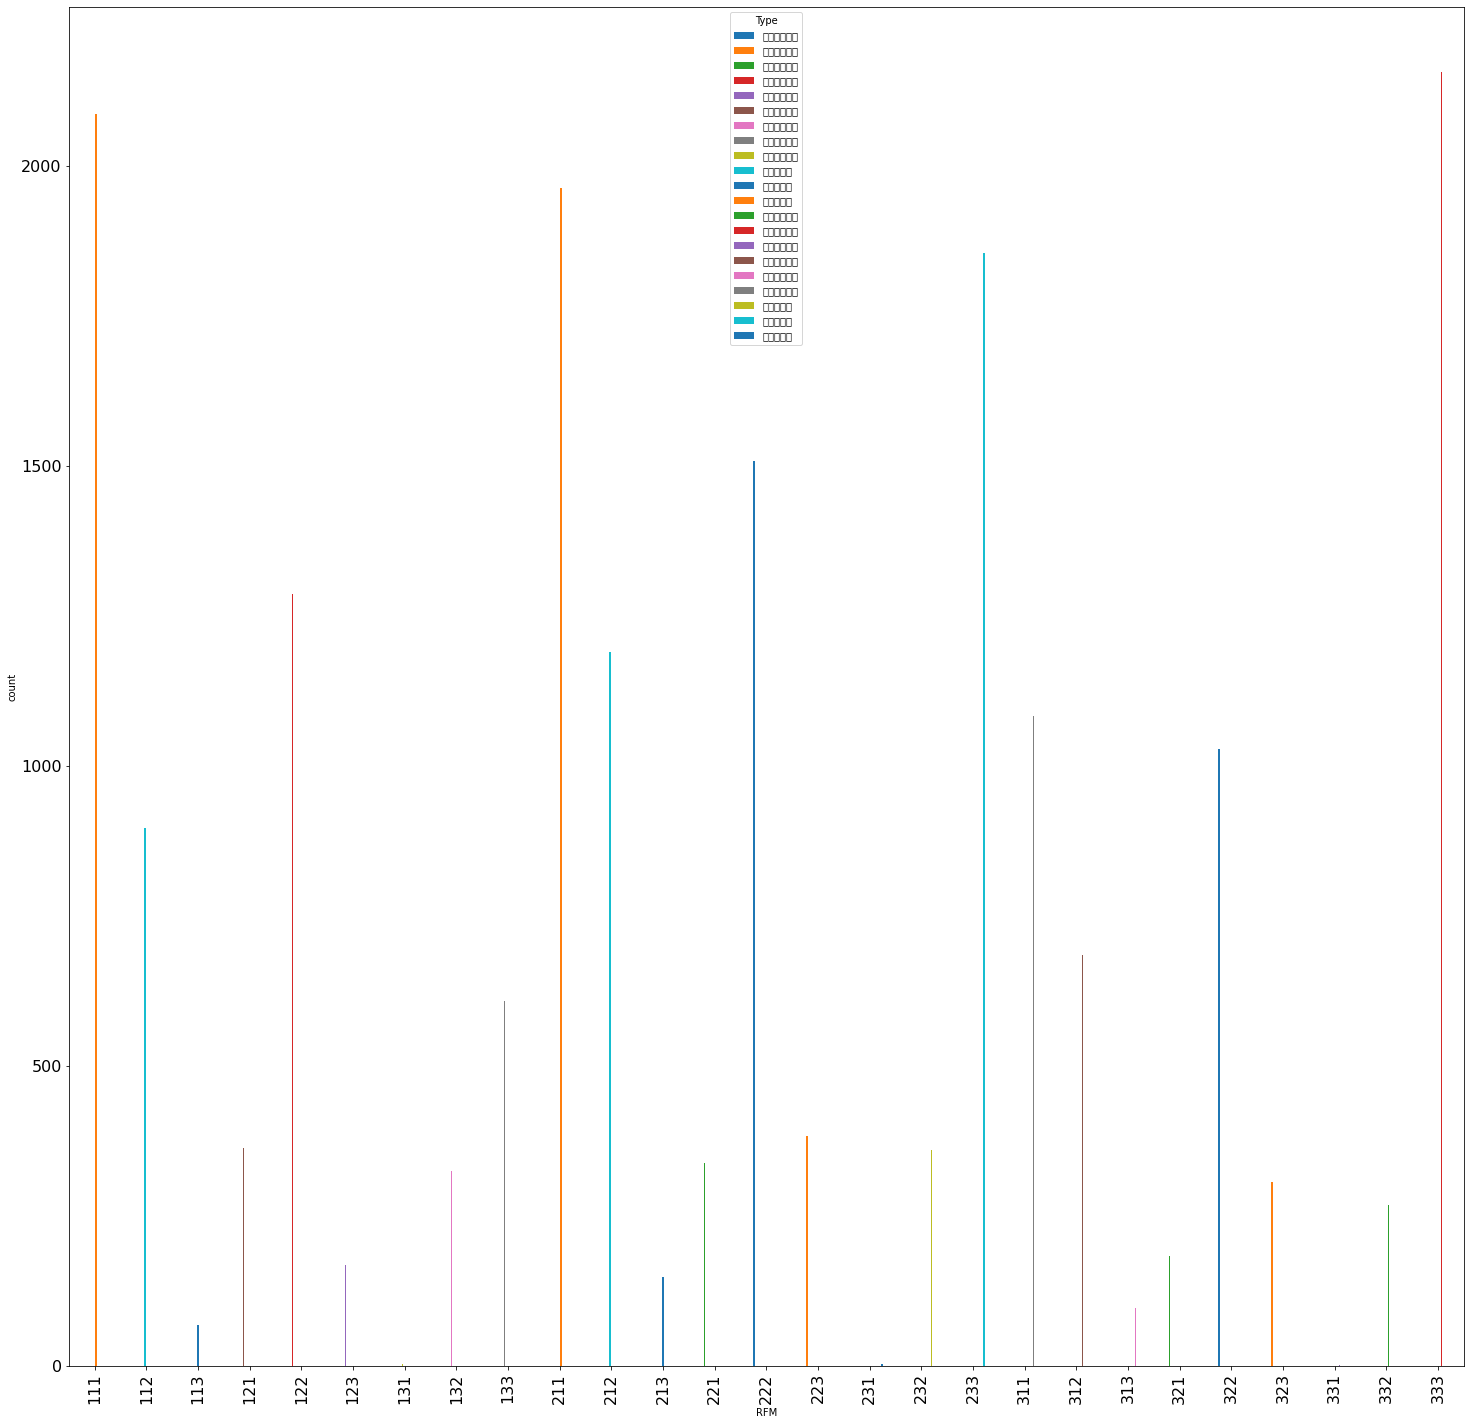

RFM  Type  
111  低發展客戶      2086
112  低保持客戶       896
113  低價值客戶        68
121  中低發展客戶     364
122  中低保持客戶    1286
123  中低價值客戶     168
131  中高發展客戶       3
132  中高保持客戶     325
133  中高價值客戶     609
211  低發展客戶      1963
212  低保持客戶      1190
213  低價值客戶       149
221  一般發展客戶     338
222  一般保持客戶    1508
223  一般價值客戶     383
231  高發展客戶         3
232  高保持客戶       360
233  高價值客戶      1855
311  重點發展客戶    1084
312  重點保持客戶     685
313  重點價值客戶      96
321  一般發展客戶     183
322  一般保持客戶    1028
323  一般價值客戶     307
331  尊榮發展客戶       1
332  尊榮保持客戶     268
333  尊榮價值客戶    2157
Name: RFM, dtype: int64


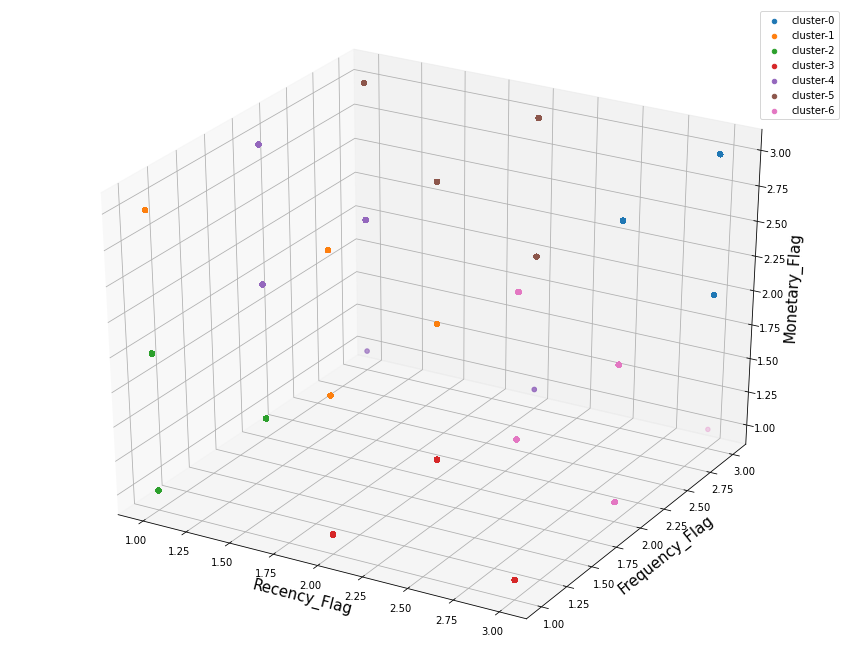

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
color = sns.color_palette()

quantiles = rfmData.quantile(q=[0.3,0.7])
rfmData['Recency_Flag'] = rfmData['recency'].apply(RTable,args=('recency',quantiles))
rfmData['Frequency_Flag'] = rfmData['frequency'].apply(FMTable,args=('frequency',quantiles))
rfmData['Monetary_Flag'] = rfmData['monetary'].apply(FMTable,args=('monetary',quantiles))

rfmData['RFM'] = rfmData.Recency_Flag + rfmData.Frequency_Flag + rfmData.Monetary_Flag
rangeNumber = ['1','2','3']
rfmRange = [i + j + k for i in rangeNumber for j in rangeNumber for k in rangeNumber]
rfm_RF_types = ["低", '中低', '中高', '低',  '一般', '高', '重點', '一般', '尊榮']
rfm_M_types = ['發展', '保持', '價值']
CustomerType = pd.DataFrame(
    data={
        'RFM': rfmRange,
        'Type': [RF + M + '客戶' for RF in rfm_RF_types for M in rfm_M_types]
    }
)
rfmData = rfmData.reset_index().merge(CustomerType, how='left').set_index('牌照號碼')
rfmData_bar = rfmData
rfmData_bar = rfmData_bar.groupby(by=['RFM', 'Type'])['RFM'].agg('count')
tmp2 = rfmData_bar.unstack()
tmp2.plot(kind='bar',figsize=(25,25))
plt.ylabel('count')
plt.xlabel('RFM')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
print(rfmData_bar)

#3D picture
Cust_rfmData = rfmData.iloc[:,3:6].reset_index()
Cust_rfmData = Cust_rfmData.astype({'Recency_Flag': int,'Frequency_Flag': int,'Monetary_Flag': int})
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=0).fit(Cust_rfmData.iloc[:,1:4])
Cust_rfmData['clusters'] = kmeans.fit_predict(Cust_rfmData.drop(columns='牌照號碼'))

fig = plt.figure(figsize = (15, 12))
ax = plt.axes(projection ="3d")
data_3d=[]
legend_3d=[]

for i in range(0,7):
    df_3d = Cust_rfmData[Cust_rfmData.clusters==i]
    data_3d.append([df_3d['Recency_Flag'].values,
                    df_3d['Frequency_Flag'].values,
                    df_3d['Monetary_Flag'].values])

for i in range(0,7):
    ax.scatter3D(data_3d[i][0],
                 data_3d[i][1],
                 data_3d[i][2],
                 color = color[i])
    legend_3d.append(f'cluster-{i}')
ax.set_xlabel('Recency_Flag', fontsize = 15)
ax.set_ylabel('Frequency_Flag', fontsize = 15)
ax.set_zlabel('Monetary_Flag', fontsize = 15)

ax.legend(legend_3d)
plt.show()

In [12]:
filterdata = dataframe

otherWord = ['折扣','捐血','保固','自','帶',"損血",'改','錯','贈','送','卷','免費','補','工資','工質','檢查','校正','調整','算','+','.']
mask = [all(x not in r for x in otherWord) for r in filterdata['維修項目名稱']]
filterdata = filterdata[mask]

def handleFilterFunc(word, outFilter, className): 
  mask = [any(x in r for x in word) for r in filterdata['維修項目名稱']]
  tmpdata = filterdata[mask]
  mask = [all(x not in r for x in outFilter) for r in tmpdata['維修項目名稱']]
  tmpdata = tmpdata[mask]
  tmpdata['維修項目名稱'] = className
  return tmpdata

oilFilterdata = handleFilterFunc(['專用油','L機油','MAMY機油'], ['*','-',','], '機油')
tiresFilterdata = handleFilterFunc(['胎'], ['*',',','內胎'], '輪胎')
brakesFilterdata = handleFilterFunc(['煞'], ['煞車油','精品','交換','線路','清潔','襯套'], '煞車')
marsFilterdata = handleFilterFunc(['火星塞'], ['交換','不完全'], '火星塞')
airFilterdata = handleFilterFunc(['空氣濾清器'], [], '空氣濾清器')
filterData = pd.concat([oilFilterdata, tiresFilterdata, brakesFilterdata, marsFilterdata, airFilterdata], sort=True)
print()

In [13]:
data = filterData.groupby(['牌照號碼', '維修日期'])['維修項目名稱'].apply(lambda x: ','.join(x)).reset_index()
for index, row in data.iterrows():
  data['維修項目名稱'][index] = list(set(row['維修項目名稱'].split(',')))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
te = TransactionEncoder()

detailData = data['維修項目名稱']
te_ary = te.fit
te = TransactionEncoder()
te_ary = te.fit(detailData).transform(detailData)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df,min_support=0.05,use_colnames=True)
frequent_itemsets['item_length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets[frequent_itemsets['item_length'] >= 2].reset_index())
print(association_rules(frequent_itemsets, metric="confidence",min_threshold=0.05))

   index   support              itemsets  item_length
0      5  0.073857    (空氣濾清器, 機油)            2
1      6  0.050487  (空氣濾清器, 火星塞)            2
2      7  0.050152          (輪胎, 煞車)            2
    antecedents   consequents  antecedent support  consequent support  \
0  (空氣濾清器)        (機油)            0.353548            0.399282   
1        (機油)  (空氣濾清器)            0.399282            0.353548   
2  (空氣濾清器)      (火星塞)            0.353548            0.128111   
3      (火星塞)  (空氣濾清器)            0.128111            0.353548   
4        (輪胎)        (煞車)            0.239715            0.131247   
5        (煞車)        (輪胎)            0.131247            0.239715   

    support  confidence      lift  leverage  conviction  
0  0.073857    0.208903  0.523196 -0.067308    0.759348  
1  0.073857    0.184975  0.523196 -0.067308    0.793168  
2  0.050487    0.142801  1.114668  0.005194    1.017138  
3  0.050487    0.394089  1.114668  0.005194    1.066909  
4  0.050152    0.209214  1.594053  0.01

# 新增區段